# Measuring [BMI] in OpenSAFELY-TPP
This short report describes how [BMI] can be identified in the OpenSAFELY-TPP database, and the strengths and weaknesses of the method. This is a living document that will be updated to reflect changes to the OpenSAFELY-TPP database and the patient records within.

## OpenSAFELY
OpenSAFELY is an analytics platform for conducting analyses on Electronic Health Records inside the secure environment where the records are held. This has multiple benefits: 

* We don't transport large volumes of potentially disclosive pseudonymised patient data outside of the secure environments for analysis
* Analyses can run in near real-time as records are ready for analysis as soon as they appear in the secure environment
* All infrastructure and analysis code is stored in GitHub repositories, which are open for security review, scientific review, and re-use

A key feature of OpenSAFELY is the use of study definitions, which are formal specifications of the datasets to be generated from the OpenSAFELY database. This takes care of much of the complex EHR data wrangling required to create a dataset in an analysis-ready format. It also creates a library of standardised and validated variable definitions that can be deployed consistently across multiple projects. 

The purpose of this report is to describe all such variables that relate to [BMI], their relative strengths and weaknesses, in what scenarios they are best deployed. It will also describe potential future definitions that have not yet been implemented.

## Available Records
OpenSAFELY-TPP runs inside TPP’s data centre which contains the primary care records for all patients registered at practices using TPP’s SystmOne Clinical Information System. This data centre also imports external datasets from other sources, including A&E attendances and hospital admissions from NHS Digital’s Secondary Use Service, and death registrations from the ONS. More information on available data sources can be found within the OpenSAFELY documentation. 

In [1]:
from report_functions import *

In [2]:
### CONFIGURE OPTIONS HERE ###

In [3]:
# Import file
input_path = '../output/data/input_all.feather'

# Definitions
definitions = ['derived_bmi', 'recorded_bmi', 'computed_bmi']

# Dates
date_min = '2019-01-01'
date_max = '2019-12-31'
time_delta = 'M'

# Min/max range
min_range = 4
max_range = 200

# Covariates
demographic_covariates = ['age_band', 'sex', 'ethnicity', 'region', 'imd']
clinical_covariates = ['dementia', 'diabetes', 'hypertension', 'learning_disability']

# to add back later: ['chronic_cardiac_disease', 'chronic_kidney_disease', 'chronic_liver_disease',
#                     'chronic_respiratory_disease', 'cancer_haem', 'cancer_lung', 'cancer_other', 'housebound']

In [4]:
# Preprocess data with configurations above
num_definitions = len(definitions)
df_occ = preprocess_data(input_path, definitions, demographic_covariates, clinical_covariates, date_min, date_max, time_delta, num_definitions)

_______
## Descriptive Statistics

### Occurrence

#### Unique Patients by Definition

In [5]:
count_unique(df_occ, definitions, time_delta, 'patient')

,counts
pat_derived_bmi,24994
pat_recorded_bmi,24994
pat_computed_bmi,20023
pat_both_derived_bmi_recorded_bmi,24994
pat_both_derived_bmi_computed_bmi,20023
pat_both_recorded_bmi_computed_bmi,20023
pat_all_filled,20023
pat_all_missing,0


In [6]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
age_band,,,,,,,,
0-19,1764,1764,1382,1764,1382,1382,1382,0
70-79,1698,1698,1325,1698,1325,1325,1325,0
80+,1691,1691,1372,1691,1372,1372,1372,0
50-59,1812,1812,1460,1812,1460,1460,1460,0
60-69,1796,1796,1467,1796,1467,1467,1467,0
30-39,1624,1624,1292,1624,1292,1292,1292,0
20-29,1700,1700,1367,1700,1367,1367,1367,0
40-49,1621,1621,1323,1621,1323,1323,1323,0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
sex,,,,,,,,
F,9140,9140,7309,9140,7309,7309,7309,0
M,9452,9452,7561,9452,7561,7561,7561,0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
ethnicity,,,,,,,,
1,1350.0,1350.0,1084.0,1350.0,1084.0,1084.0,1084.0,0.0
3,352.0,352.0,277.0,352.0,277.0,277.0,277.0,0.0
2,622.0,622.0,497.0,622.0,497.0,497.0,497.0,0.0
6,40.0,40.0,30.0,40.0,30.0,30.0,30.0,0.0
5,162.0,162.0,128.0,162.0,128.0,128.0,128.0,0.0
4,183.0,183.0,156.0,183.0,156.0,156.0,156.0,0.0
8,14.0,14.0,12.0,14.0,12.0,12.0,12.0,0.0
7,4.0,4.0,3.0,4.0,3.0,3.0,3.0,0.0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
region,,,,,,,,
East Midlands,848.0,848.0,680.0,848.0,680.0,680.0,680.0,0.0
North East,870.0,870.0,694.0,870.0,694.0,694.0,694.0,0.0
West Midlands,846.0,846.0,680.0,846.0,680.0,680.0,680.0,0.0
East of England,787.0,787.0,611.0,787.0,611.0,611.0,611.0,0.0
South East,1834.0,1834.0,1477.0,1834.0,1477.0,1477.0,1477.0,0.0
North West,877.0,877.0,715.0,877.0,715.0,715.0,715.0,0.0
London,1704.0,1704.0,1340.0,1704.0,1340.0,1340.0,1340.0,0.0
Yorkshire and the Humber,794.0,794.0,620.0,794.0,620.0,620.0,620.0,0.0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
imd,,,,,,,,
100,2803,2803,2239,2803,2239,2239,2239,0
300,2958,2958,2398,2958,2398,2398,2398,0
400,2971,2971,2342,2971,2342,2342,2342,0
200,2924,2924,2353,2924,2353,2353,2353,0
500,2956,2956,2369,2956,2369,2369,2369,0


In [7]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'patient', group)

,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
dementia,,,,,,,,
False,24632,24632,19730,24632,19730,19730,19730,0
True,122,122,99,122,99,99,99,0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
diabetes,,,,,,,,
False,24622,24622,19721,24622,19721,19721,19721,0
True,120,120,96,120,96,96,96,0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
hypertension,,,,,,,,
False,24638,24638,19737,24638,19737,19737,19737,0
True,120,120,95,120,95,95,95,0


,pat_derived_bmi,pat_recorded_bmi,pat_computed_bmi,pat_both_derived_bmi_recorded_bmi,pat_both_derived_bmi_computed_bmi,pat_both_recorded_bmi_computed_bmi,pat_all_filled,pat_all_missing
learning_disability,,,,,,,,
False,24600,24600,19707,24600,19707,19707,19707,0
True,120,120,98,120,98,98,98,0


### Unique Measurements by Definition

In [8]:
count_unique(df_occ, definitions, time_delta, 'measurement')

,counts
meas_derived_bmi,12000000
meas_recorded_bmi,12000000
meas_computed_bmi,9612000
meas_both_derived_bmi_recorded_bmi,12000000
meas_both_derived_bmi_computed_bmi,9612000
meas_both_recorded_bmi_computed_bmi,9612000
meas_all_filled,9612000
meas_all_missing,0


In [9]:
for group in demographic_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
age_band,,,,,,,,
0-19,201632,201632,157540,201632,157540,157540,157540,0
70-79,183002,183002,141483,183002,141483,141483,141483,0
80+,183395,183395,148232,183395,148232,148232,148232,0
50-59,204260,204260,165372,204260,165372,165372,165372,0
60-69,201492,201492,165229,201492,165229,165229,165229,0
30-39,177562,177562,141767,177562,141767,141767,141767,0
20-29,188130,188130,150324,188130,150324,150324,150324,0
40-49,170707,170707,139444,170707,139444,139444,139444,0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
sex,,,,,,,,
F,2946286,2946286,2355578,2946286,2355578,2355578,2355578,0
M,3058286,3058286,2454434,3058286,2454434,2454434,2454434,0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
ethnicity,,,,,,,,
1,35234.0,35234.0,28127.0,35234.0,28127.0,28127.0,28127.0,0.0
3,2146.0,2146.0,1765.0,2146.0,1765.0,1765.0,1765.0,0.0
2,7272.0,7272.0,5800.0,7272.0,5800.0,5800.0,5800.0,0.0
6,38.0,38.0,25.0,38.0,25.0,25.0,25.0,0.0
5,338.0,338.0,279.0,338.0,279.0,279.0,279.0,0.0
4,603.0,603.0,523.0,603.0,523.0,523.0,523.0,0.0
8,12.0,12.0,8.0,12.0,8.0,8.0,8.0,0.0
7,4.0,4.0,3.0,4.0,3.0,3.0,3.0,0.0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
region,,,,,,,,
East Midlands,51586.0,51586.0,41656.0,51586.0,41656.0,41656.0,41656.0,0.0
North East,54764.0,54764.0,43681.0,54764.0,43681.0,43681.0,43681.0,0.0
West Midlands,53852.0,53852.0,43187.0,53852.0,43187.0,43187.0,43187.0,0.0
East of England,45981.0,45981.0,36002.0,45981.0,36002.0,36002.0,36002.0,0.0
South East,217194.0,217194.0,174200.0,217194.0,174200.0,174200.0,174200.0,0.0
North West,57015.0,57015.0,46248.0,57015.0,46248.0,46248.0,46248.0,0.0
London,190608.0,190608.0,150295.0,190608.0,150295.0,150295.0,150295.0,0.0
Yorkshire and the Humber,45568.0,45568.0,35825.0,45568.0,35825.0,35825.0,35825.0,0.0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
imd,,,,,,,,
100,441913,441913,352484,441913,352484,352484,352484,0
300,494334,494334,400594,494334,400594,400594,400594,0
400,490703,490703,388465,490703,388465,388465,388465,0
200,483598,483598,389576,483598,389576,389576,389576,0
500,497650,497650,397775,497650,397775,397775,397775,0


In [10]:
for group in clinical_covariates:
    count_unique(df_occ, definitions, time_delta, 'measurement', group)

,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
dementia,,,,,,,,
False,11761200,11761200,9419850,11761200,9419850,9419850,9419850,0
True,1200,1200,970,1200,970,970,970,0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
diabetes,,,,,,,,
False,11761200,11761200,9420840,11761200,9420840,9420840,9420840,0
True,1200,1200,960,1200,960,960,960,0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
hypertension,,,,,,,,
False,11761200,11761200,9421830,11761200,9421830,9421830,9421830,0
True,1200,1200,950,1200,950,950,950,0


,meas_derived_bmi,meas_recorded_bmi,meas_computed_bmi,meas_both_derived_bmi_recorded_bmi,meas_both_derived_bmi_computed_bmi,meas_both_recorded_bmi_computed_bmi,meas_all_filled,meas_all_missing
learning_disability,,,,,,,,
False,11761200,11761200,9418860,11761200,9418860,9418860,9418860,0
True,1200,1200,980,1200,980,980,980,0


#### Frequency of Update

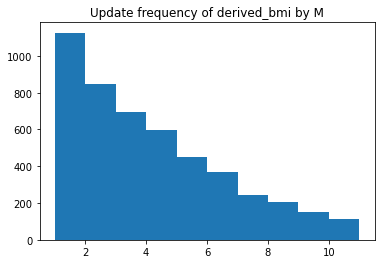

Average update frequency of derived_bmi by M: 3.68



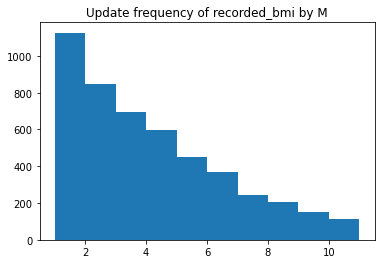

Average update frequency of recorded_bmi by M: 3.68



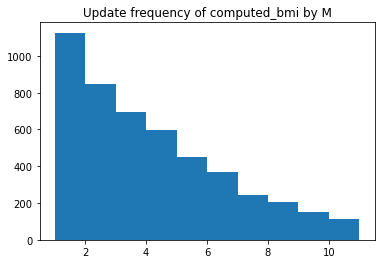

Average update frequency of computed_bmi by M: 3.68



In [11]:
report_update_frequency(df_occ, definitions, time_delta)

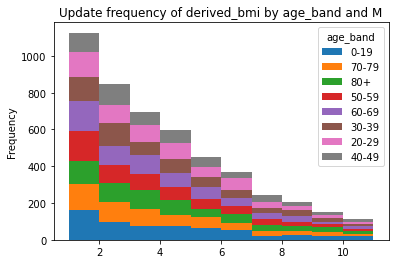

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
age_band,
0-19,3.660163
70-79,3.631399
80+,3.825083
50-59,3.548760
60-69,3.538705
30-39,3.712397
20-29,3.754501
40-49,3.770093


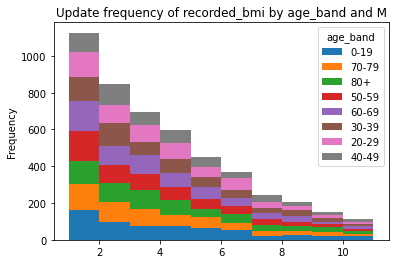

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
age_band,
0-19,3.660163
70-79,3.631399
80+,3.825083
50-59,3.548760
60-69,3.538705
30-39,3.712397
20-29,3.754501
40-49,3.770093


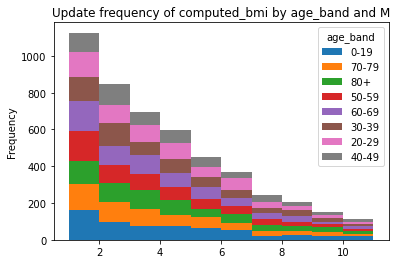

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
age_band,
0-19,3.660163
70-79,3.631399
80+,3.825083
50-59,3.548760
60-69,3.538705
30-39,3.712397
20-29,3.754501
40-49,3.770093


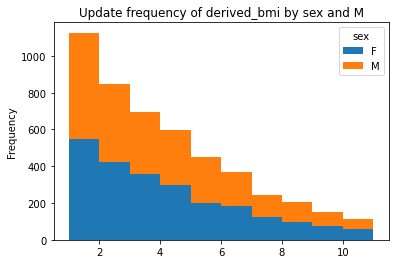

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
sex,
F,3.678253
M,3.678293


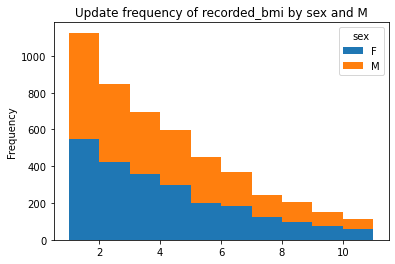

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
sex,
F,3.678253
M,3.678293


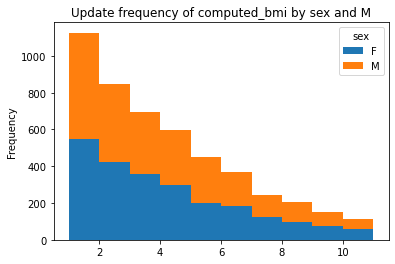

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
sex,
F,3.678253
M,3.678293


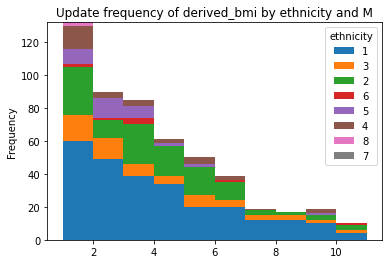

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
ethnicity,
1,3.626923
3,3.645161
2,3.644628
6,3.555556
5,2.454545
4,3.257143
8,1.000000
7,NaN


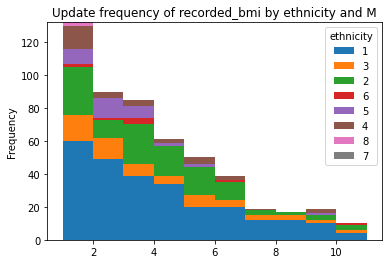

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
ethnicity,
1,3.626923
3,3.645161
2,3.644628
6,3.555556
5,2.454545
4,3.257143
8,1.000000
7,NaN


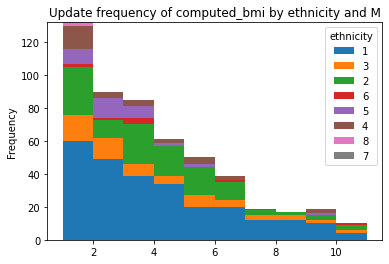

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
ethnicity,
1,3.626923
3,3.645161
2,3.644628
6,3.555556
5,2.454545
4,3.257143
8,1.000000
7,NaN


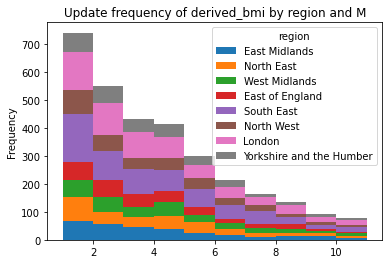

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
region,
East Midlands,3.652027
North East,3.629393
West Midlands,3.739130
East of England,3.637874
South East,3.674312
North West,3.670588
London,3.680992
Yorkshire and the Humber,3.596215


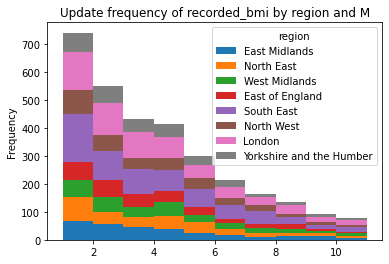

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
region,
East Midlands,3.652027
North East,3.629393
West Midlands,3.739130
East of England,3.637874
South East,3.674312
North West,3.670588
London,3.680992
Yorkshire and the Humber,3.596215


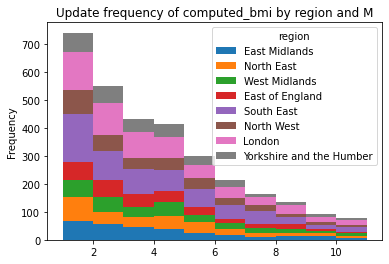

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
region,
East Midlands,3.652027
North East,3.629393
West Midlands,3.739130
East of England,3.637874
South East,3.674312
North West,3.670588
London,3.680992
Yorkshire and the Humber,3.596215


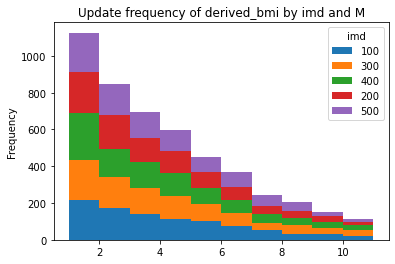

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
imd,
100,3.648109
300,3.803681
400,3.633643
200,3.599581
500,3.704136


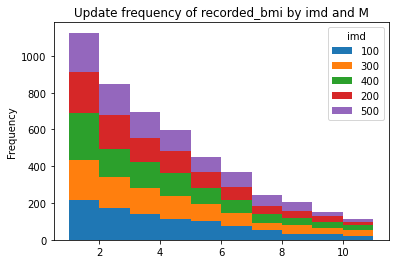

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
imd,
100,3.648109
300,3.803681
400,3.633643
200,3.599581
500,3.704136


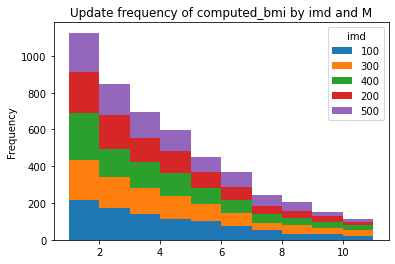

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
imd,
100,3.648109
300,3.803681
400,3.633643
200,3.599581
500,3.704136


In [12]:
for group in demographic_covariates:
    report_update_frequency(df_occ, definitions, time_delta, group)

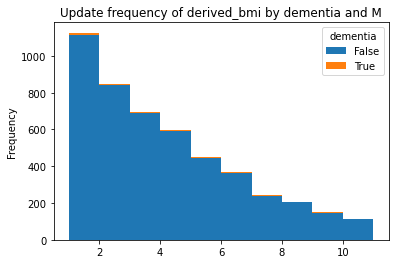

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
dementia,
False,3.677955
True,3.714286


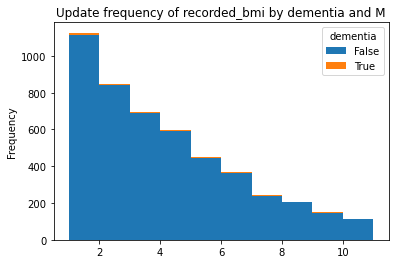

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
dementia,
False,3.677955
True,3.714286


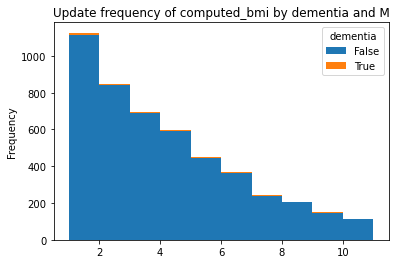

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
dementia,
False,3.677955
True,3.714286


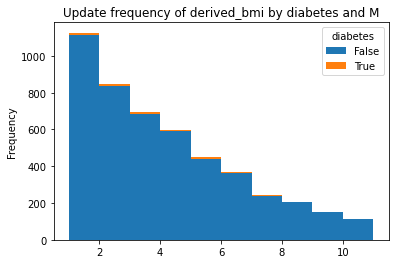

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
diabetes,
False,3.682824
True,3.254902


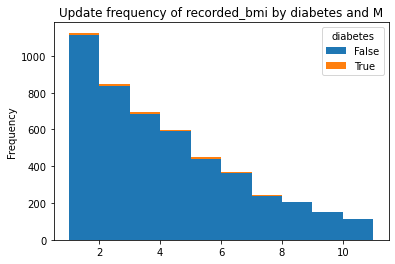

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
diabetes,
False,3.682824
True,3.254902


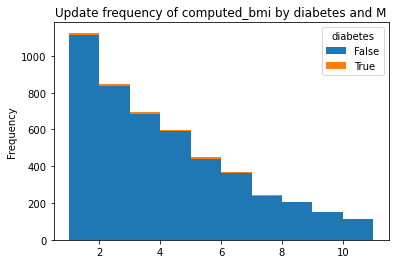

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
diabetes,
False,3.682824
True,3.254902


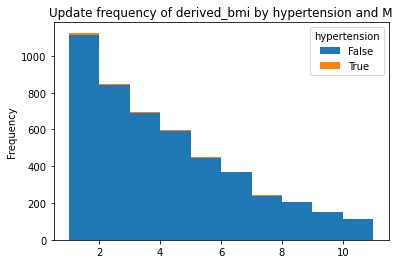

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
hypertension,
False,3.679916
True,3.487805


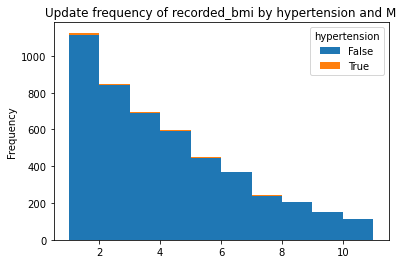

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
hypertension,
False,3.679916
True,3.487805


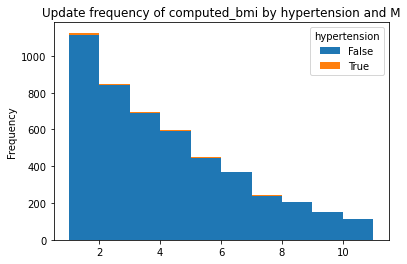

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
hypertension,
False,3.679916
True,3.487805


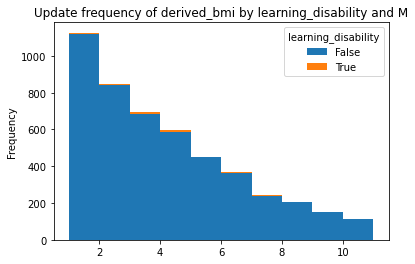

Average update frequency of derived_bmi by M:



,date_diff_derived_bmi
learning_disability,
False,3.679301
True,3.574468


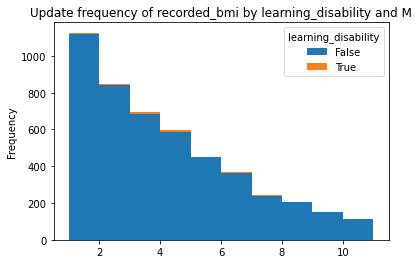

Average update frequency of recorded_bmi by M:



,date_diff_recorded_bmi
learning_disability,
False,3.679301
True,3.574468


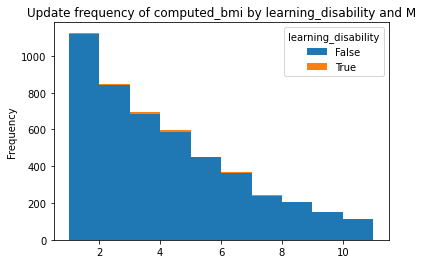

Average update frequency of computed_bmi by M:



,date_diff_computed_bmi
learning_disability,
False,3.679301
True,3.574468


In [13]:
for group in clinical_covariates:
    report_update_frequency(df_occ, definitions, time_delta, group)

#### Unique Patients Over Time

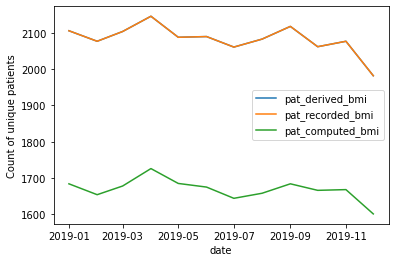

In [14]:
report_over_time(df_occ, definitions, 'patient')

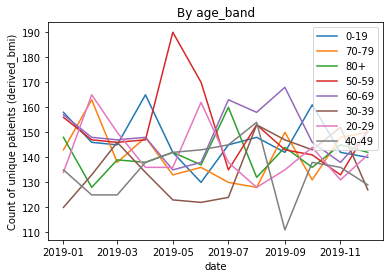

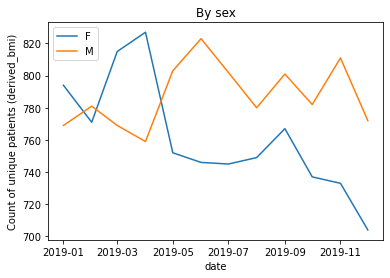

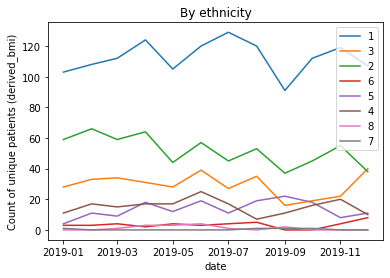

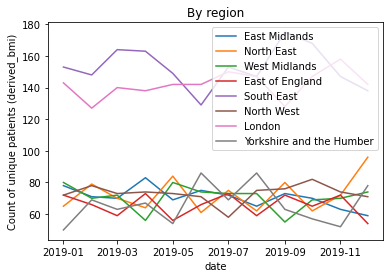

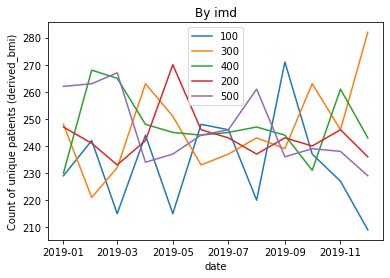

In [15]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

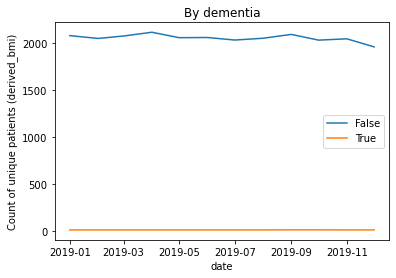

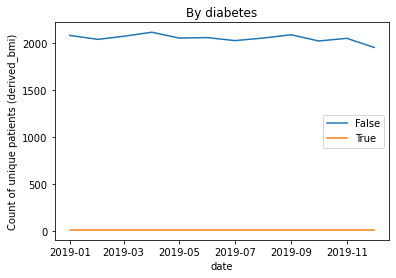

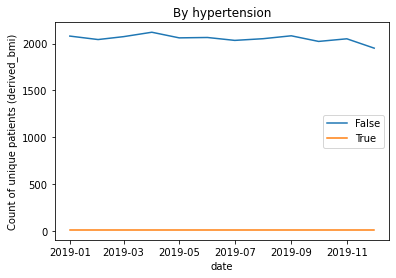

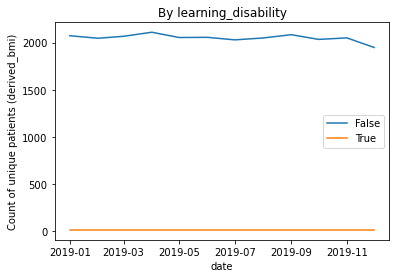

In [16]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'patient', group)

#### Unique Measurements Over Time

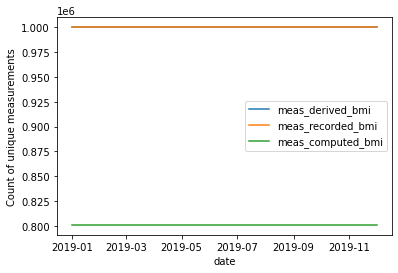

In [17]:
report_over_time(df_occ, definitions, 'measurement')

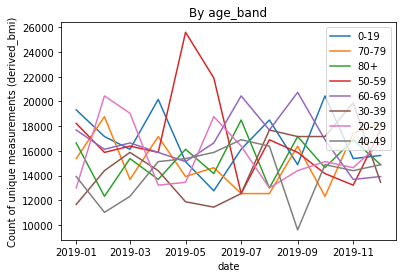

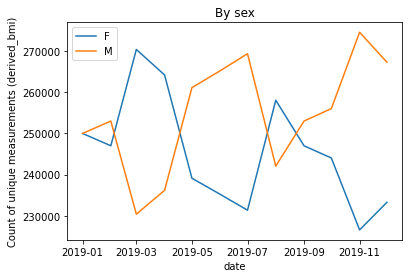

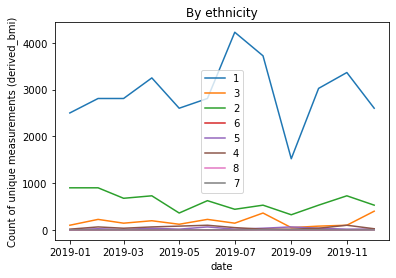

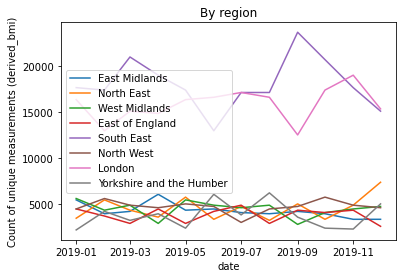

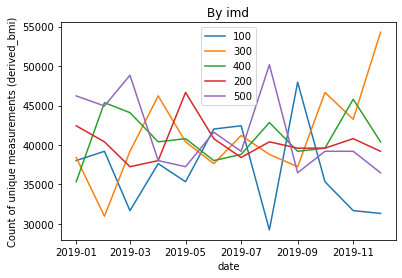

In [18]:
for group in demographic_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

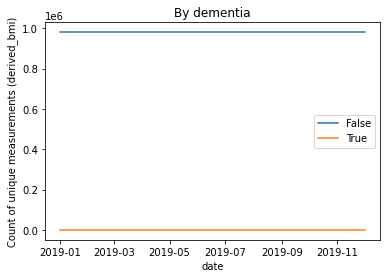

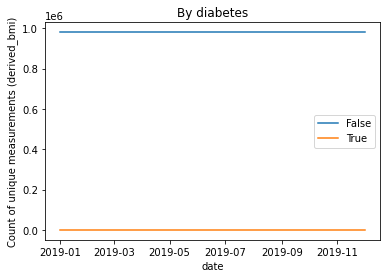

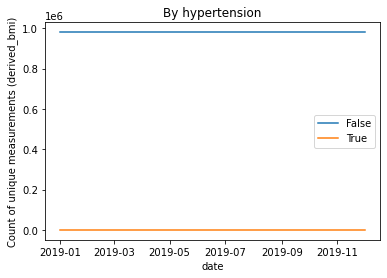

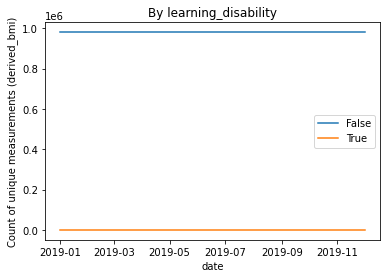

In [19]:
for group in clinical_covariates:
    report_over_time(df_occ, definitions, 'measurement', group)

### Value
#### Comparison Across Definitions

In [20]:
compare_value(df_occ, definitions)

,comparison,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,473.0,11527.0,13.560449
1,derived_bmi_computed_bmi,389.0,9223.0,13.314545
2,recorded_bmi_computed_bmi,379.0,9233.0,11.242467


In [21]:
for group in demographic_covariates:
    compare_value(df_occ, definitions, group)

,comparison,age_band,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,0-19,63.0,1489.0,13.832811
1,derived_bmi_recorded_bmi,70-79,54.0,1424.0,13.312767
2,derived_bmi_recorded_bmi,80+,59.0,1422.0,13.114842
3,derived_bmi_recorded_bmi,50-59,68.0,1490.0,13.092142
4,derived_bmi_recorded_bmi,60-69,62.0,1490.0,13.873334
5,derived_bmi_recorded_bmi,30-39,61.0,1393.0,13.577177
6,derived_bmi_recorded_bmi,20-29,56.0,1442.0,13.782095
7,derived_bmi_recorded_bmi,40-49,50.0,1377.0,13.904522
8,derived_bmi_computed_bmi,0-19,58.0,1156.0,13.357465
9,derived_bmi_computed_bmi,70-79,42.0,1099.0,13.428866


,comparison,sex,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,F,225.0,5719.0,13.607679
1,derived_bmi_recorded_bmi,M,248.0,5808.0,13.514093
2,derived_bmi_computed_bmi,F,188.0,4564.0,13.204140
3,derived_bmi_computed_bmi,M,201.0,4659.0,13.422497
4,recorded_bmi_computed_bmi,F,180.0,4572.0,11.304460
5,recorded_bmi_computed_bmi,M,199.0,4661.0,11.181851


,comparison,ethnicity,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,1,28.0,618.0,13.654283
1,derived_bmi_recorded_bmi,3,5.0,149.0,15.316213
2,derived_bmi_recorded_bmi,2,16.0,276.0,13.406187
3,derived_bmi_recorded_bmi,6,0.0,18.0,12.938881
4,derived_bmi_recorded_bmi,5,2.0,58.0,12.116934
5,derived_bmi_recorded_bmi,4,1.0,80.0,12.953318
6,derived_bmi_recorded_bmi,8,0.0,8.0,12.922409
7,derived_bmi_recorded_bmi,7,0.0,4.0,12.241318
8,derived_bmi_computed_bmi,1,27.0,489.0,13.745126
9,derived_bmi_computed_bmi,3,5.0,120.0,14.381506


,comparison,region,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,East Midlands,28.0,756.0,13.510442
1,derived_bmi_recorded_bmi,North East,37.0,767.0,14.275284
2,derived_bmi_recorded_bmi,West Midlands,35.0,765.0,13.340915
3,derived_bmi_recorded_bmi,East of England,25.0,714.0,12.968973
4,derived_bmi_recorded_bmi,South East,58.0,1552.0,13.952937
5,derived_bmi_recorded_bmi,North West,42.0,783.0,13.463395
6,derived_bmi_recorded_bmi,London,64.0,1446.0,13.566207
7,derived_bmi_recorded_bmi,Yorkshire and the Humber,28.0,700.0,13.983076
8,derived_bmi_computed_bmi,East Midlands,25.0,607.0,12.652453
9,derived_bmi_computed_bmi,North East,33.0,608.0,13.521093


,comparison,imd,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,100,83.0,2214.0,13.632305
1,derived_bmi_recorded_bmi,300,90.0,2340.0,13.727073
2,derived_bmi_recorded_bmi,400,108.0,2317.0,13.468344
3,derived_bmi_recorded_bmi,200,99.0,2309.0,13.585929
4,derived_bmi_recorded_bmi,500,93.0,2347.0,13.393258
5,derived_bmi_computed_bmi,100,73.0,1758.0,13.059889
6,derived_bmi_computed_bmi,300,81.0,1888.0,13.389257
7,derived_bmi_computed_bmi,400,92.0,1828.0,13.346135
8,derived_bmi_computed_bmi,200,75.0,1865.0,13.260682
9,derived_bmi_computed_bmi,500,68.0,1884.0,13.500512


In [22]:
for group in clinical_covariates:
    compare_value(df_occ, definitions, group)

,comparison,dementia,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,False,466.0,11414.0,13.547657
1,derived_bmi_recorded_bmi,True,7.0,113.0,14.826898
2,derived_bmi_computed_bmi,False,382.0,9133.0,13.330903
3,derived_bmi_computed_bmi,True,7.0,90.0,11.709880
4,recorded_bmi_computed_bmi,False,376.0,9139.0,11.225871
5,recorded_bmi_computed_bmi,True,3.0,94.0,12.870336


,comparison,diabetes,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,False,472.0,11408.0,13.556361
1,derived_bmi_recorded_bmi,True,1.0,119.0,13.965148
2,derived_bmi_computed_bmi,False,387.0,9129.0,13.329998
3,derived_bmi_computed_bmi,True,2.0,94.0,11.782738
4,recorded_bmi_computed_bmi,False,377.0,9139.0,11.252726
5,recorded_bmi_computed_bmi,True,2.0,94.0,10.225523


,comparison,hypertension,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,False,468.0,11412.0,13.552489
1,derived_bmi_recorded_bmi,True,5.0,115.0,14.348547
2,derived_bmi_computed_bmi,False,382.0,9135.0,13.315331
3,derived_bmi_computed_bmi,True,7.0,88.0,13.235767
4,recorded_bmi_computed_bmi,False,375.0,9142.0,11.236187
5,recorded_bmi_computed_bmi,True,4.0,91.0,11.871561


,comparison,learning_disability,num_equal,num_diff,avg_diff
0,derived_bmi_recorded_bmi,False,465.0,11415.0,13.571509
1,derived_bmi_recorded_bmi,True,8.0,112.0,12.465567
2,derived_bmi_computed_bmi,False,385.0,9129.0,13.312487
3,derived_bmi_computed_bmi,True,4.0,94.0,13.514351
4,recorded_bmi_computed_bmi,False,374.0,9140.0,11.245486
5,recorded_bmi_computed_bmi,True,5.0,93.0,10.949369


#### Values Out of Range

In [23]:
report_out_of_range(df_occ, definitions, min_range, max_range)

,counts
out_of_range_derived_bmi,2399.0
out_of_range_recorded_bmi,2388.0
out_of_range_computed_bmi,1926.0


In [24]:
for group in demographic_covariates:
    report_out_of_range(df_occ, definitions, min_range, max_range, group)

,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
age_band,,,
0-19,337.0,308.0,258.0
70-79,296.0,261.0,233.0
80+,306.0,253.0,247.0
50-59,300.0,323.0,226.0
60-69,275.0,339.0,244.0
30-39,300.0,301.0,235.0
20-29,289.0,310.0,246.0
40-49,296.0,293.0,237.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
sex,,,
F,1144.0,1189.0,939.0
M,1255.0,1199.0,987.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
ethnicity,,,
1,136.0,136.0,113.0
3,40.0,33.0,28.0
2,66.0,57.0,47.0
6,2.0,4.0,4.0
5,13.0,7.0,8.0
4,15.0,14.0,11.0
8,3.0,0.0,1.0
7,2.0,0.0,0.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
region,,,
East Midlands,149.0,156.0,122.0
North East,190.0,178.0,137.0
West Midlands,146.0,160.0,133.0
East of England,136.0,147.0,110.0
South East,328.0,312.0,279.0
North West,175.0,174.0,135.0
London,314.0,305.0,229.0
Yorkshire and the Humber,160.0,150.0,117.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
imd,,,
100,446.0,463.0,345.0
300,479.0,480.0,397.0
400,516.0,500.0,404.0
200,476.0,485.0,385.0
500,482.0,460.0,395.0


In [25]:
for group in clinical_covariates:
    report_out_of_range(df_occ, definitions, min_range, max_range, group)

,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
dementia,,,
False,2371.0,2356.0,1908.0
True,28.0,32.0,18.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
diabetes,,,
False,2383.0,2364.0,1916.0
True,16.0,24.0,10.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
hypertension,,,
False,2374.0,2362.0,1905.0
True,25.0,26.0,21.0


,out_of_range_derived_bmi,out_of_range_recorded_bmi,out_of_range_computed_bmi
learning_disability,,,
False,2376.0,2368.0,1904.0
True,23.0,20.0,22.0


#### Distributions

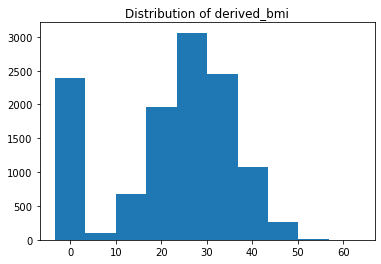

Average derived_bmi: 22.399701204751977



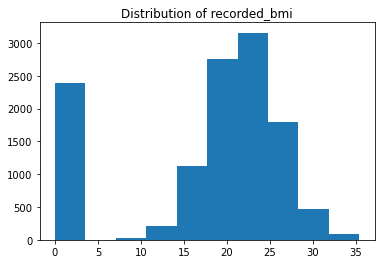

Average recorded_bmi: 17.609419635432882



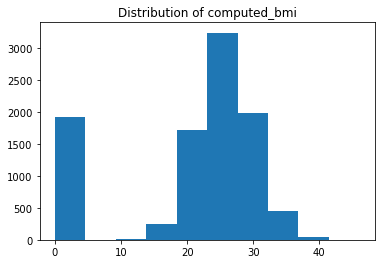

Average computed_bmi: 20.61688540685457



In [26]:
distribution_hist(df_occ, definitions)

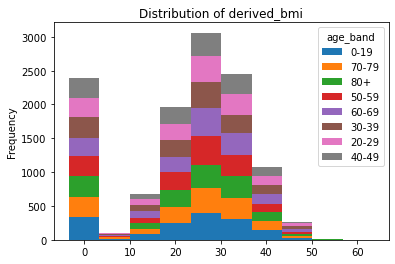

Average derived_bmi:



,derived_bmi
age_band,
0-19,21.982902
70-79,22.318169
80+,22.235954
50-59,22.453574
60-69,23.310577
30-39,22.065973
20-29,22.718372
40-49,22.063432


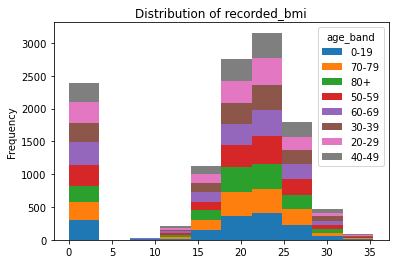

Average recorded_bmi:



,recorded_bmi
age_band,
0-19,17.578873
70-79,18.066008
80+,18.048691
50-59,17.532099
60-69,17.093435
30-39,17.471201
20-29,17.518124
40-49,17.596114


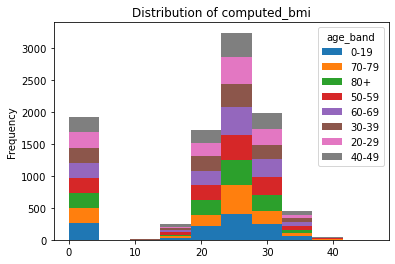

Average computed_bmi:



,computed_bmi
age_band,
0-19,20.246944
70-79,20.442897
80+,20.405417
50-59,21.182673
60-69,21.022130
30-39,20.445034
20-29,20.481272
40-49,20.645511


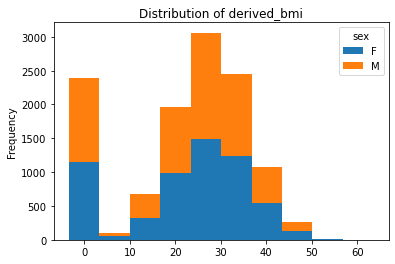

Average derived_bmi:



,derived_bmi
sex,
F,22.666113
M,22.138217


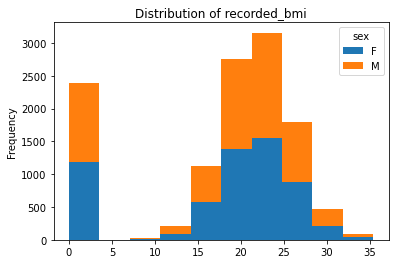

Average recorded_bmi:



,recorded_bmi
sex,
F,17.526604
M,17.690704


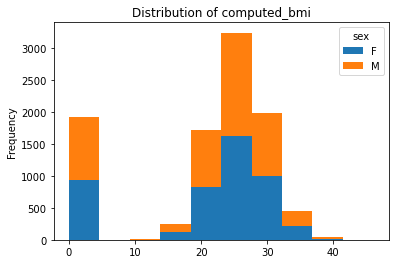

Average computed_bmi:



,computed_bmi
sex,
F,20.708168
M,20.527631


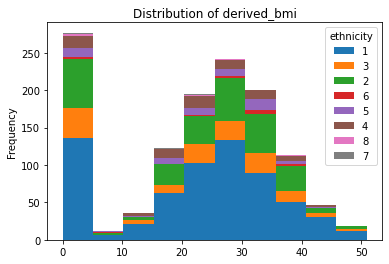

Average derived_bmi:



,derived_bmi
ethnicity,
1,22.221107
3,21.307076
2,22.399189
6,25.340204
5,21.212949
4,21.887524
8,16.578282
7,10.057300


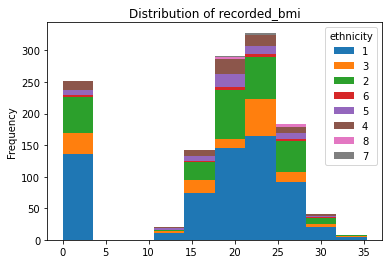

Average recorded_bmi:



,recorded_bmi
ethnicity,
1,17.186461
3,17.206290
2,17.634811
6,17.366113
5,18.290292
4,17.754349
8,22.961431
7,22.298618


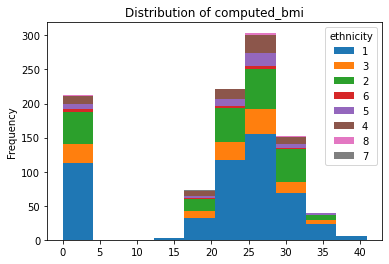

Average computed_bmi:



,computed_bmi
ethnicity,
1,20.228450
3,20.020424
2,20.929476
6,17.006856
5,21.261363
4,21.510946
8,21.228518
7,24.892370


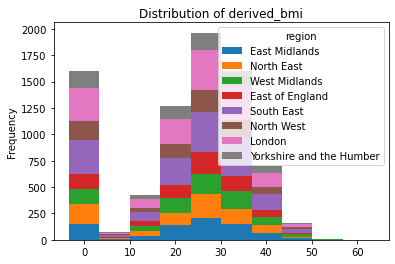

Average derived_bmi:



,derived_bmi
region,
East Midlands,22.461480
North East,21.380044
West Midlands,23.148288
East of England,22.123825
South East,22.676488
North West,21.955678
London,22.123784
Yorkshire and the Humber,21.890442


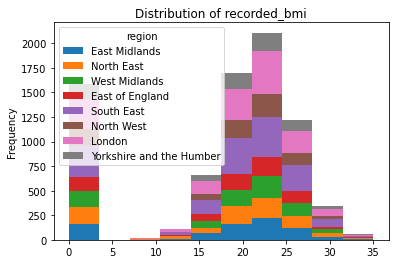

Average recorded_bmi:



,recorded_bmi
region,
East Midlands,17.573411
North East,17.050633
West Midlands,17.898805
East of England,17.459178
South East,17.768763
North West,17.280276
London,17.561369
Yorkshire and the Humber,17.571695


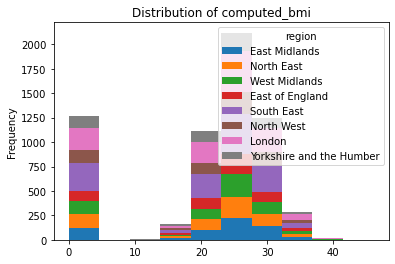

Average computed_bmi:



,computed_bmi
region,
East Midlands,20.861394
North East,20.256995
West Midlands,20.513755
East of England,20.747031
South East,20.123306
North West,20.639944
London,20.750969
Yorkshire and the Humber,20.303629


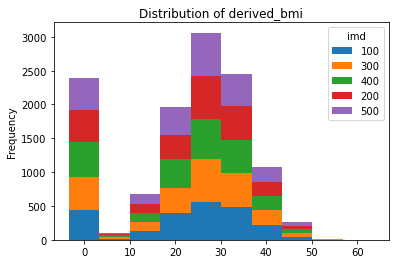

Average derived_bmi:



,derived_bmi
imd,
100,22.476560
300,22.651984
400,21.925567
200,22.529895
500,22.418831


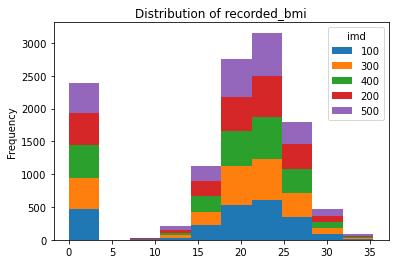

Average recorded_bmi:



,recorded_bmi
imd,
100,17.582130
300,17.635375
400,17.546893
200,17.495959
500,17.783376


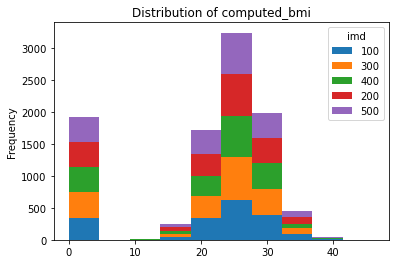

Average computed_bmi:



,computed_bmi
imd,
100,20.917248
300,20.608583
400,20.383535
200,20.655231
500,20.534932


In [27]:
for group in demographic_covariates:
    distribution_hist(df_occ, definitions, group)

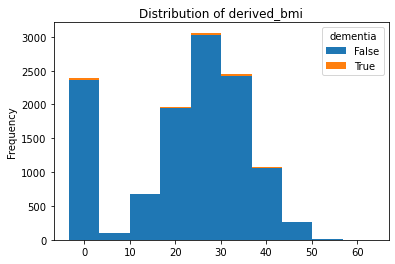

Average derived_bmi:



,derived_bmi
dementia,
False,22.401095
True,22.261731


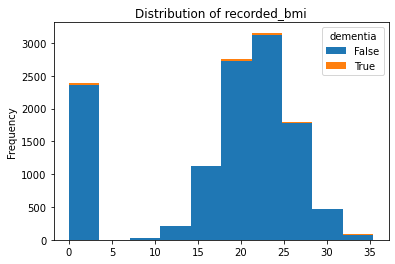

Average recorded_bmi:



,recorded_bmi
dementia,
False,17.621145
True,16.448575


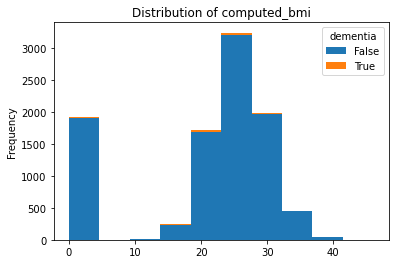

Average computed_bmi:



,computed_bmi
dementia,
False,20.614769
True,20.824448


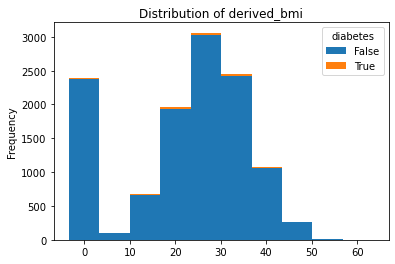

Average derived_bmi:



,derived_bmi
diabetes,
False,22.381394
True,24.212124


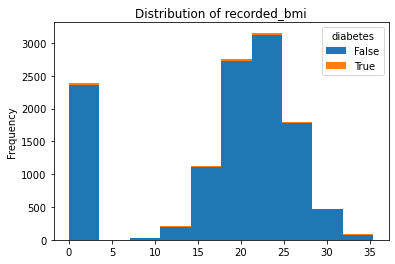

Average recorded_bmi:



,recorded_bmi
diabetes,
False,17.609558
True,17.595732


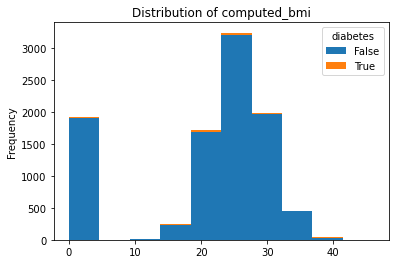

Average computed_bmi:



,computed_bmi
diabetes,
False,20.594377
True,22.848033


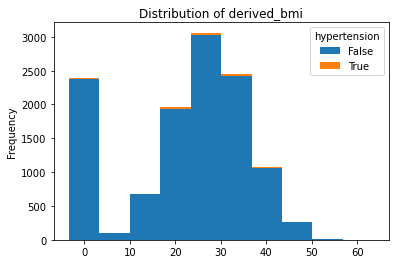

Average derived_bmi:



,derived_bmi
hypertension,
False,22.404091
True,21.965086


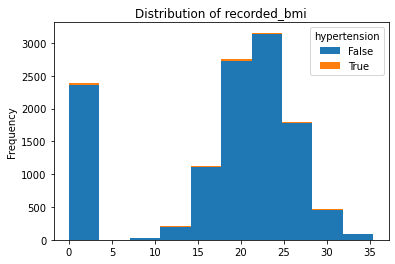

Average recorded_bmi:



,recorded_bmi
hypertension,
False,17.610663
True,17.486304


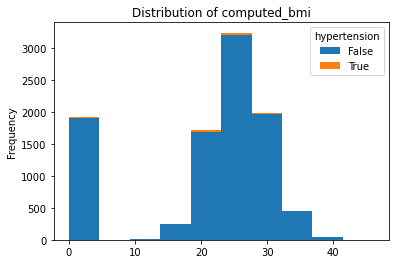

Average computed_bmi:



,computed_bmi
hypertension,
False,20.623753
True,19.928848


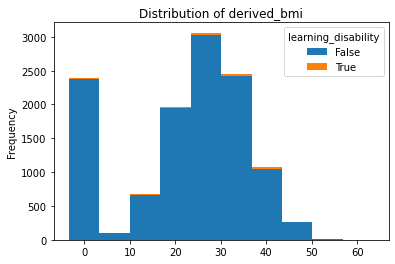

Average derived_bmi:



,derived_bmi
learning_disability,
False,22.385791
True,23.776788


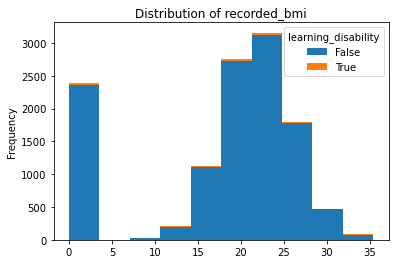

Average recorded_bmi:



,recorded_bmi
learning_disability,
False,17.605253
True,18.021926


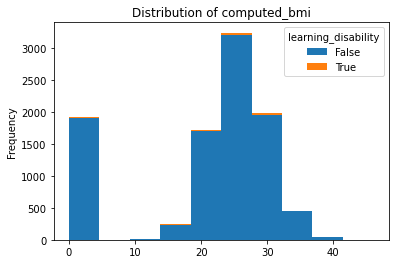

Average computed_bmi:



,computed_bmi
learning_disability,
False,20.623810
True,19.944679


In [28]:
for group in clinical_covariates:
    distribution_hist(df_occ, definitions, group)

#### Mean Values Over Time

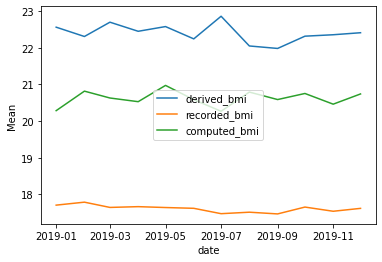

In [29]:
mean_over_time(df_occ, definitions)

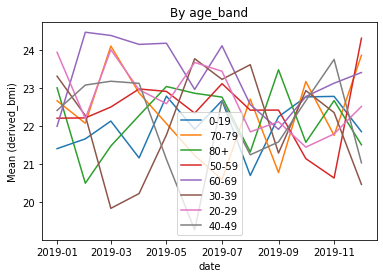

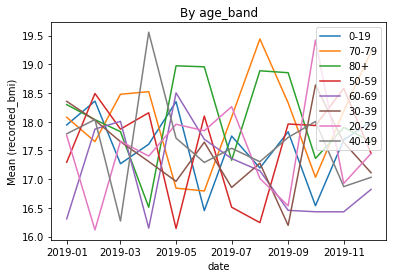

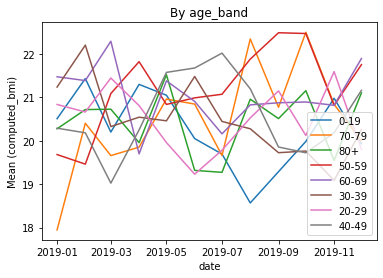

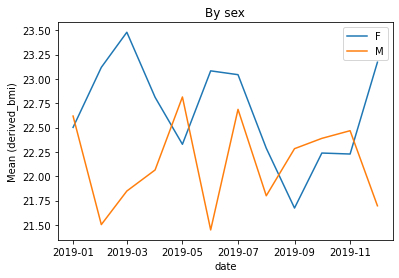

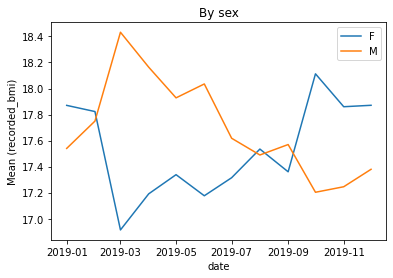

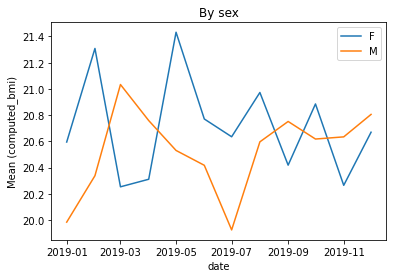

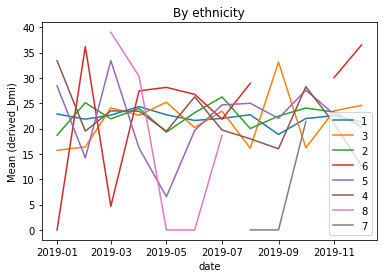

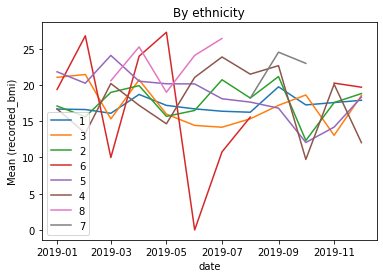

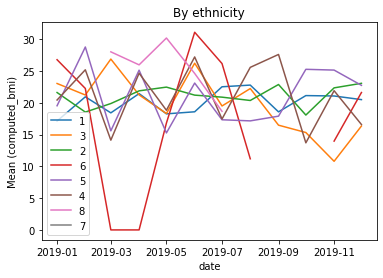

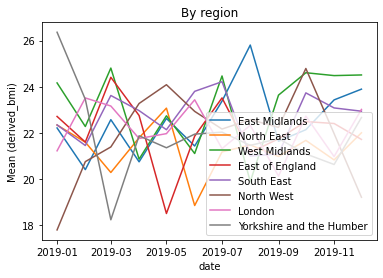

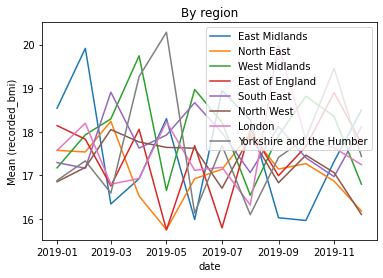

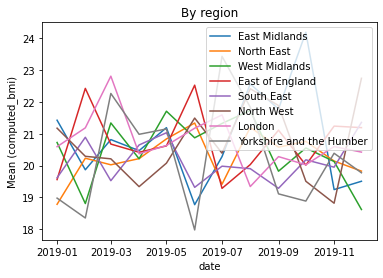

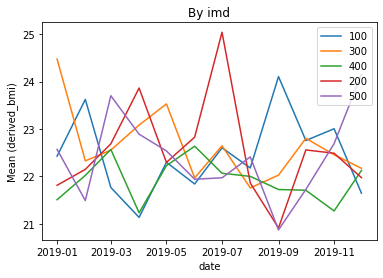

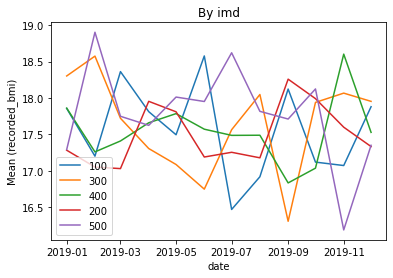

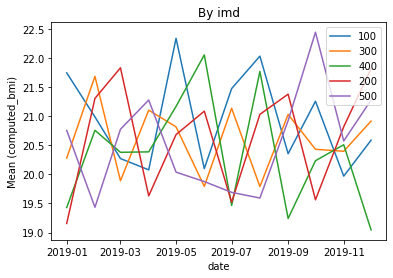

In [30]:
for group in demographic_covariates:
    mean_over_time(df_occ, definitions, group)

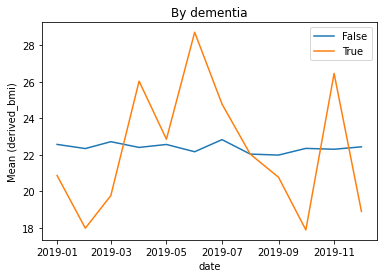

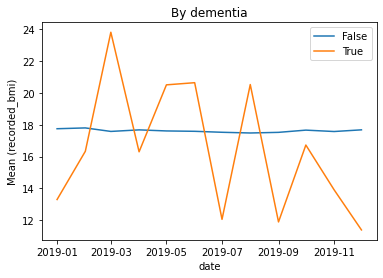

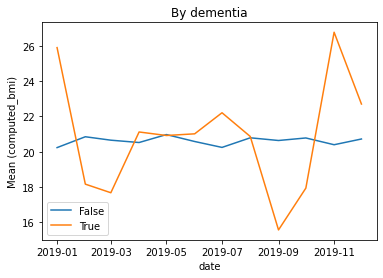

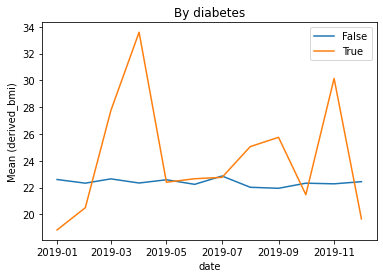

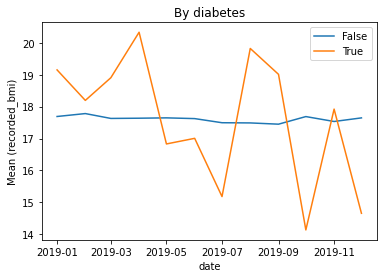

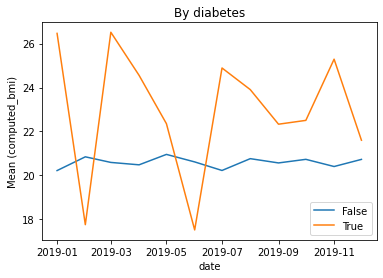

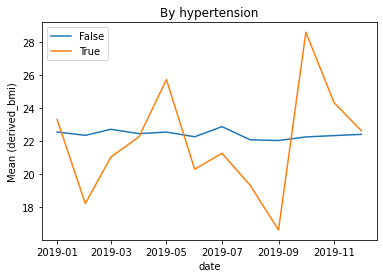

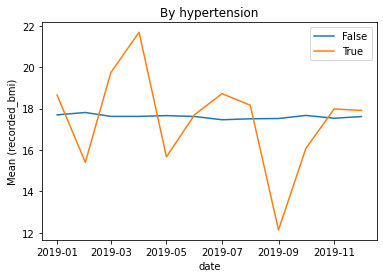

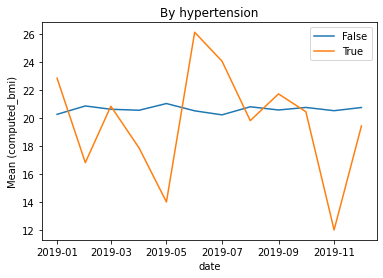

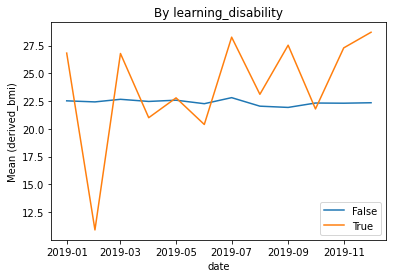

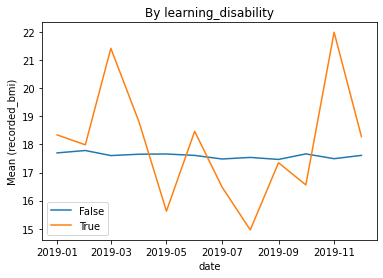

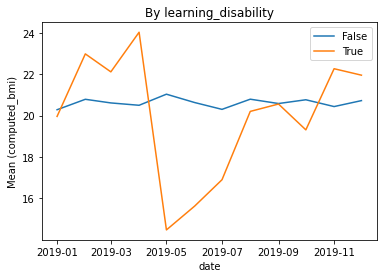

In [31]:
for group in clinical_covariates:
    mean_over_time(df_occ, definitions, group)

## Discussion

[to fill]

The purpose of this live report is to bring a systematic approach to creating, documenting, cross-checking, and sharing variables to improve analyses in OpenSAFELY-TPP. If you have improvements or edits to this report, please contact [owner].